## Importing libraries and files

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Understanding the dataset

In [246]:
print("features:",df.columns,end="\n\n")
print("shape:",df.shape,'\n')
print(df.describe(),'\n')
catcols=df.select_dtypes(include=['object']).columns
numcols=df.select_dtypes(include=['int64']).columns
print('catcol_length:',len(catcols),'\n')
print("catcols: ",catcols,'\n')
print('numcol_length:',len(numcols),'\n')
print("numcols: ",numcols,'\n')
for i in catcols:
    print(i,":",df[i].unique(),'\n')


features: Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

shape: (480, 17) 

       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000 

catcol_length: 13 

catcols:  Index

In [247]:
# Rename column class to level
df.rename(columns={'Class':'Level'},inplace=True)

In [248]:
desc = pd.DataFrame(index = list(df))
desc['dtype'] = df.dtypes
desc['count'] = df.shape[0]
desc['isnull'] = df.isnull().sum()
desc['nunique'] = df.nunique()
desc = pd.concat([desc, df.describe().T], axis=1)
desc

,dtype,count,isnull,nunique,count,mean,std,min,25%,50%,75%,max
gender,object,480,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalITy,object,480,0,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceofBirth,object,480,0,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StageID,object,480,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeID,object,480,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SectionID,object,480,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,object,480,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,object,480,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relation,object,480,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,int64,480,0,82,480.0,46.775000,30.779223,0.0,15.75,50.0,75.0,100.0


## Objectives
- To Improve grades by improving student's Platform Engagement.
- To find out what impacts the grades more.

## KPIs
- features like raisedhands,visitedresources,announcementsview and Discussion will give insights regarding platform engagement.

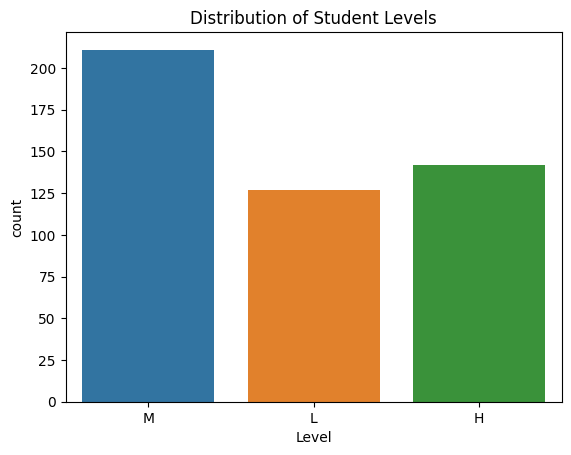

In [249]:
level_summary = df['Level'].value_counts()

sns.countplot(x='Level', data=df)
plt.title('Distribution of Student Levels')
plt.show()

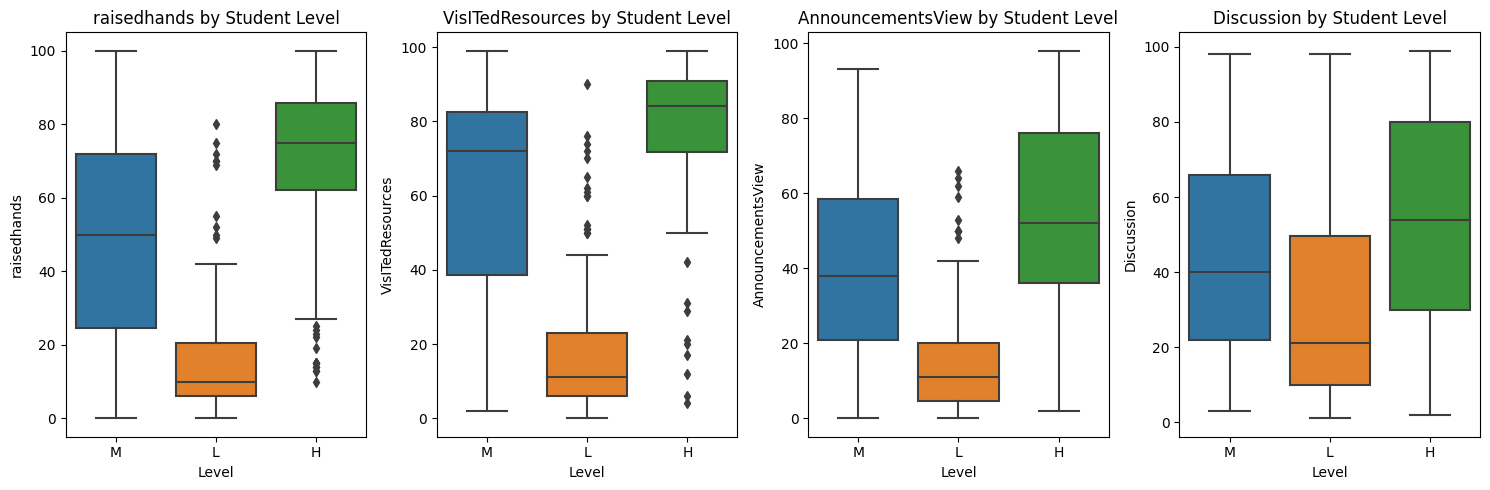

In [250]:
fig, axes = plt.subplots(nrows=1, ncols=len(numcols), figsize=(15, 5))

for i, col in enumerate(numcols):
    sns.boxplot(x='Level', y=col, data=df, ax=axes[i])
    axes[i].set_title("{} by Student Level".format(col))

plt.tight_layout()
plt.show()

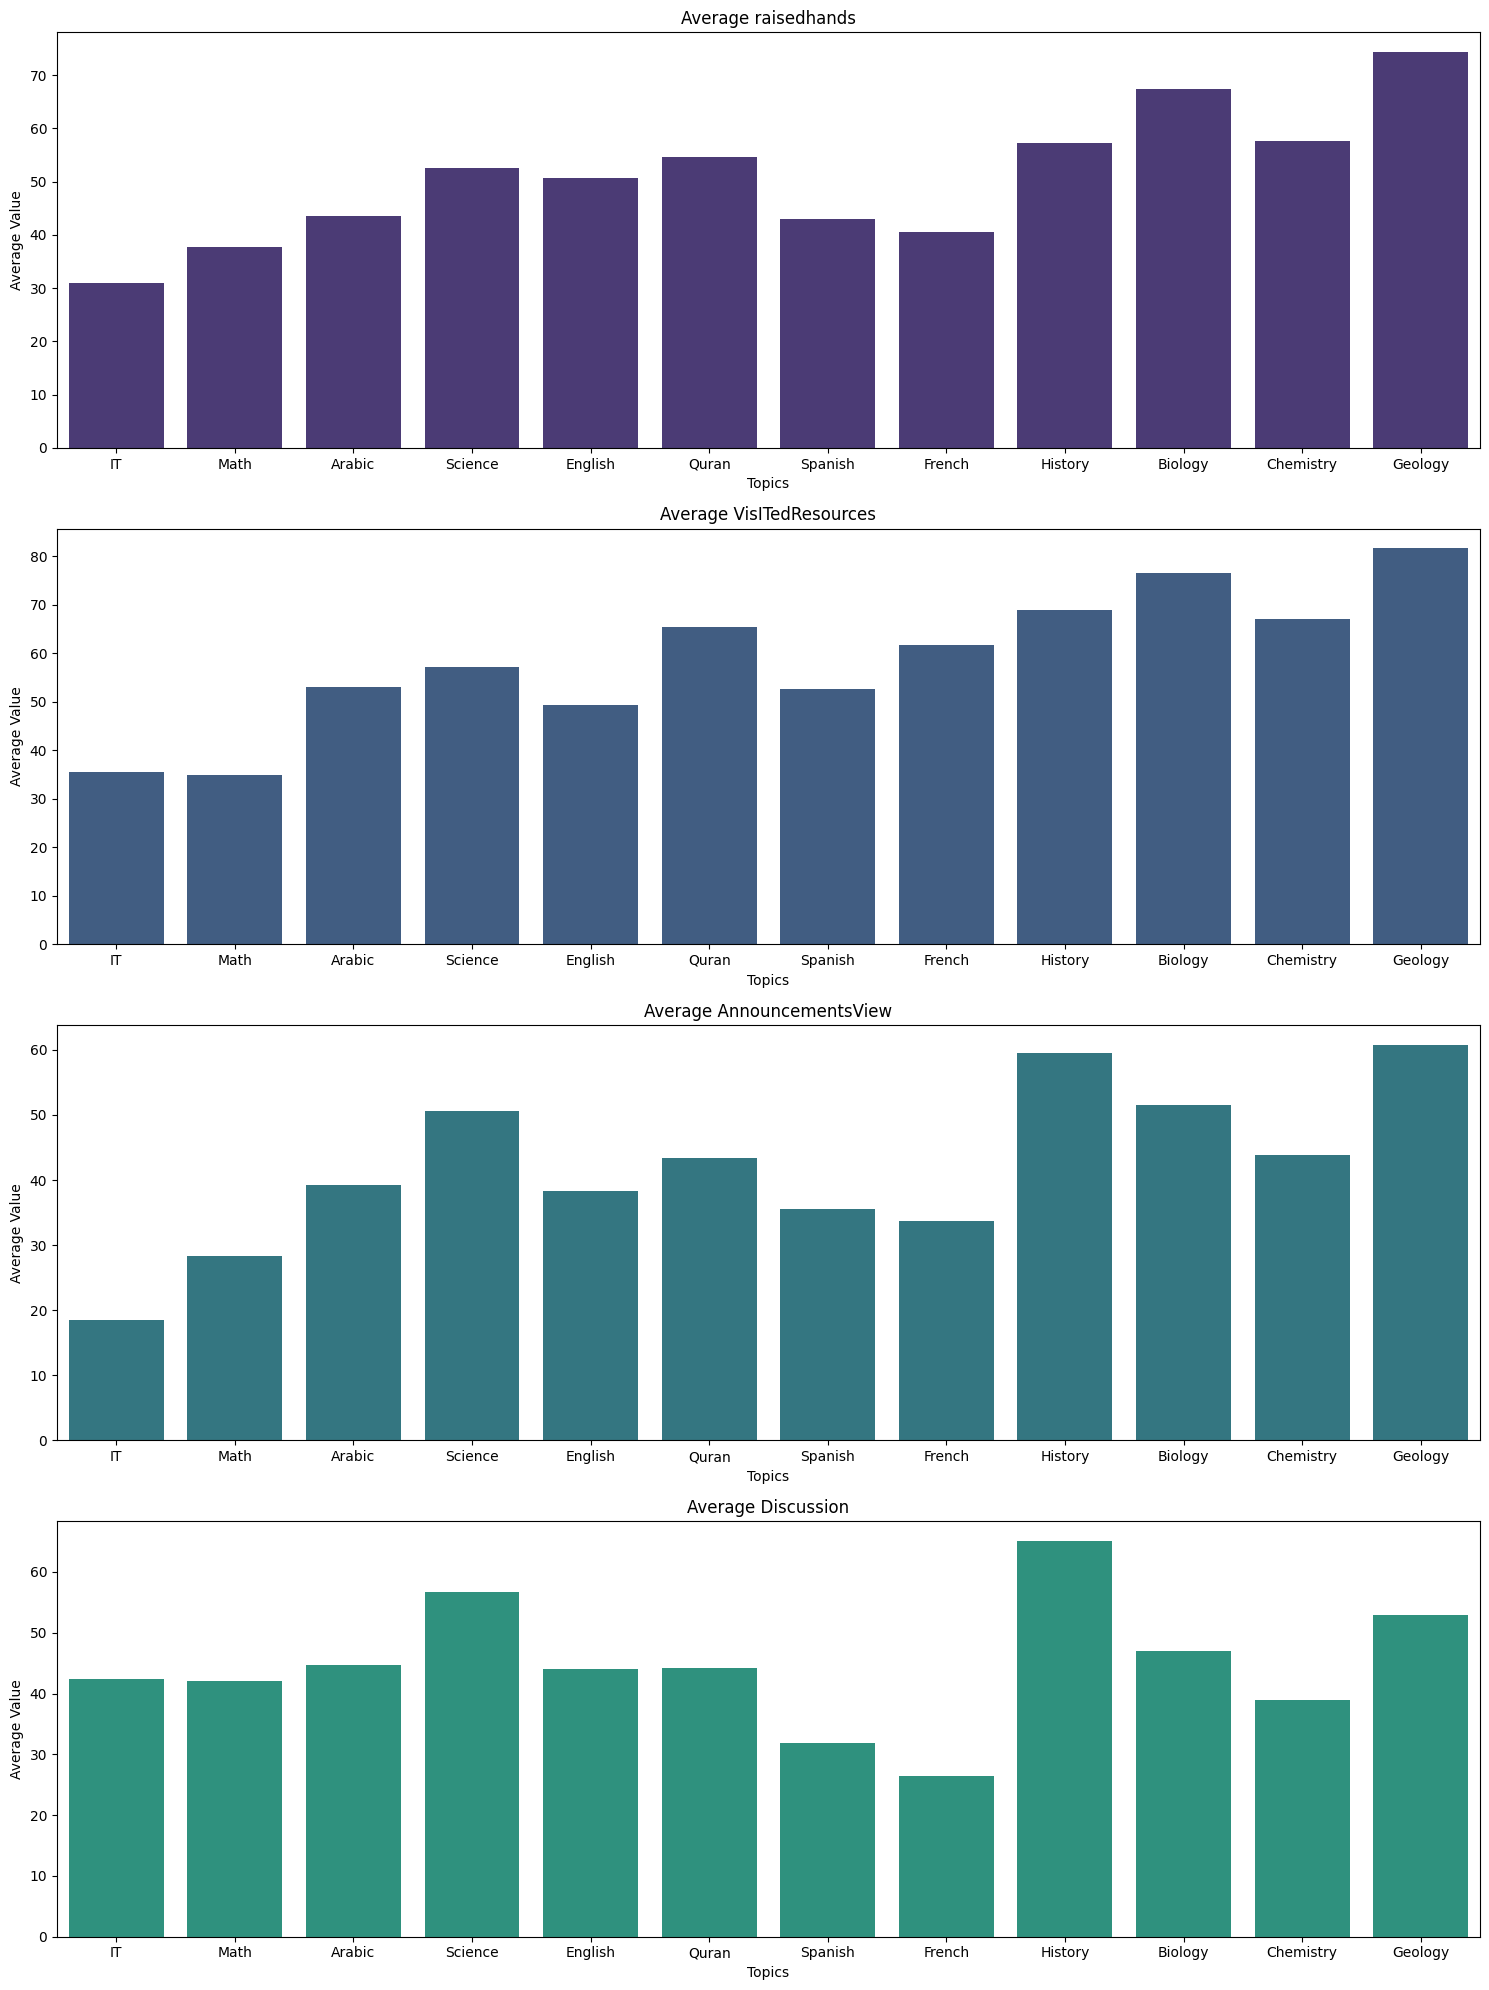

In [251]:
fig, axes = plt.subplots(nrows=len(numcols), ncols=1, figsize=(15, 5 * len(numcols)))

for i, col in enumerate(numcols):
    sns.barplot(x='Topic', y=col, data=df, ax=axes[i], color=sns.color_palette('viridis')[i],errorbar=None)
    axes[i].set_title("Average {}".format(col))
    axes[i].set_ylabel("Average Value")
    axes[i].set_xlabel("Topics")

plt.tight_layout()
plt.show()


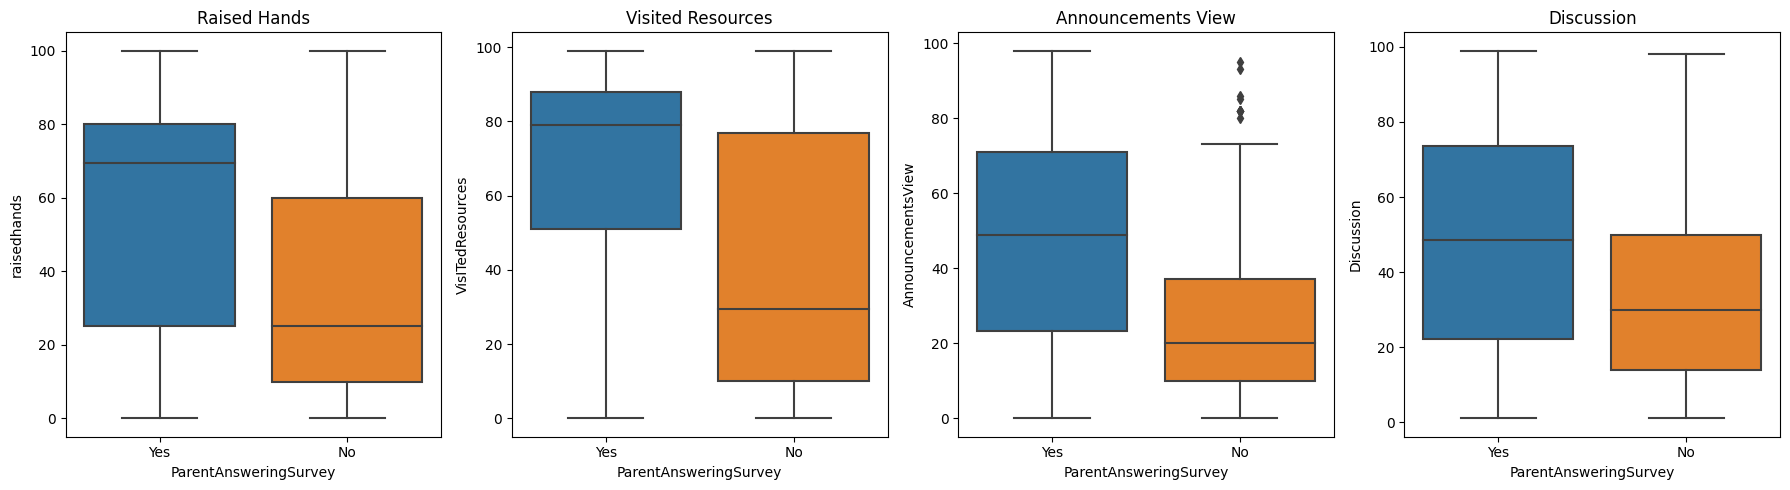

In [252]:
selected_cols = ['ParentAnsweringSurvey', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'Level']

subset_df = df[selected_cols]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

sns.boxplot(x='ParentAnsweringSurvey', y='raisedhands', data=subset_df, ax=axes[0])
sns.boxplot(x='ParentAnsweringSurvey', y='VisITedResources', data=subset_df, ax=axes[1])
sns.boxplot(x='ParentAnsweringSurvey', y='AnnouncementsView', data=subset_df, ax=axes[2])
sns.boxplot(x='ParentAnsweringSurvey', y='Discussion', data=subset_df, ax=axes[3])

axes[0].set_title("Raised Hands")
axes[1].set_title("Visited Resources")
axes[2].set_title("Announcements View")
axes[3].set_title("Discussion")

plt.tight_layout()
plt.show()


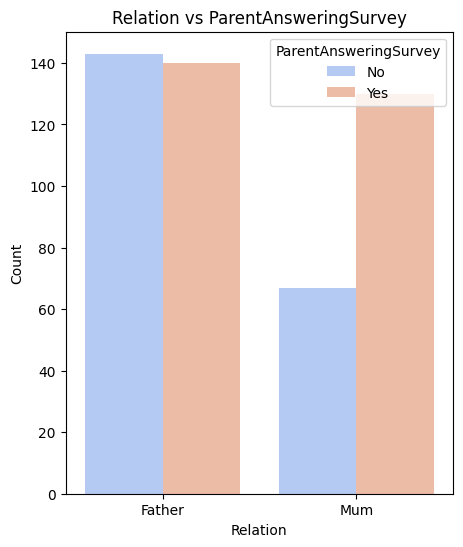

In [253]:
selected_cols = ['Relation', 'ParentAnsweringSurvey']

subset_df = df[selected_cols]

counts = subset_df.groupby(['Relation', 'ParentAnsweringSurvey']).size().reset_index(name='Count')

plt.figure(figsize=(5, 6))
sns.barplot(x='Relation', y='Count', hue='ParentAnsweringSurvey', data=counts, palette='coolwarm')

plt.title('Relation vs ParentAnsweringSurvey')
plt.xlabel('Relation')
plt.ylabel('Count')

plt.show()


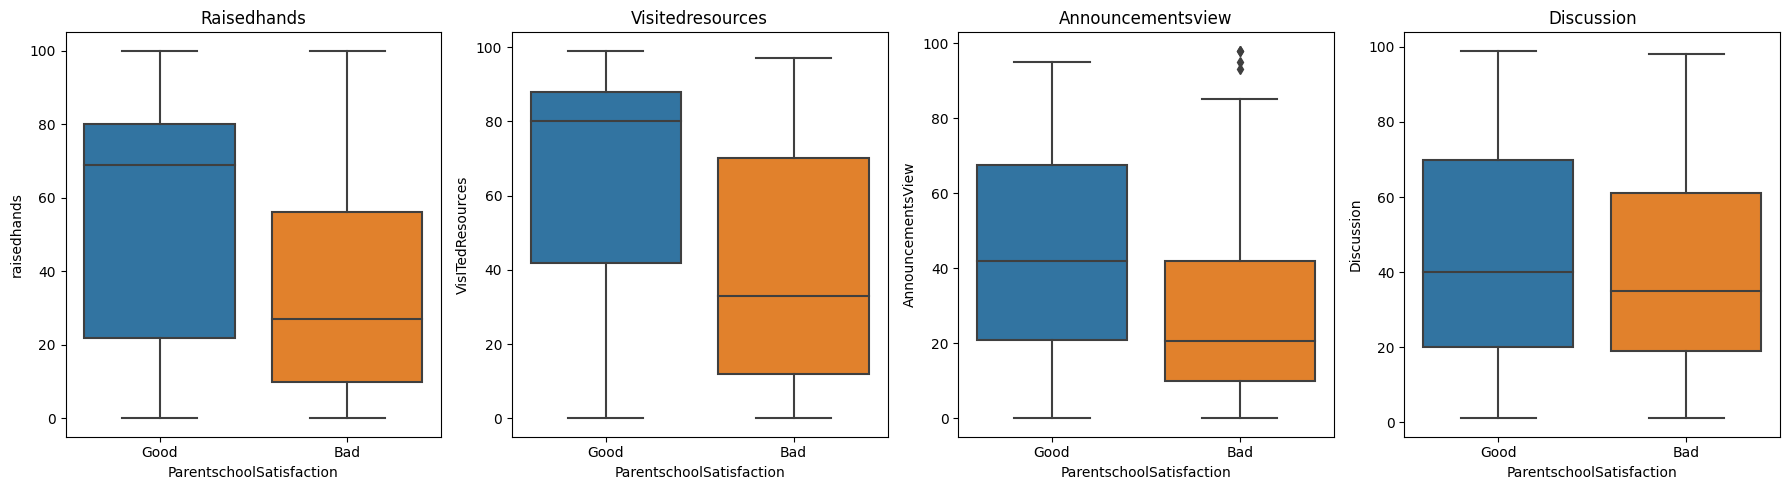

In [254]:
selected_cols = ['ParentschoolSatisfaction', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

subset_df = df[selected_cols]

fig, axes = plt.subplots(nrows=1, ncols=len(selected_cols) - 1, figsize=(18, 5))

for i, col in enumerate(selected_cols[1:]):
    sns.boxplot(x='ParentschoolSatisfaction', y=col, data=subset_df, ax=axes[i])
    axes[i].set_title(col.capitalize())

plt.tight_layout()
plt.show()

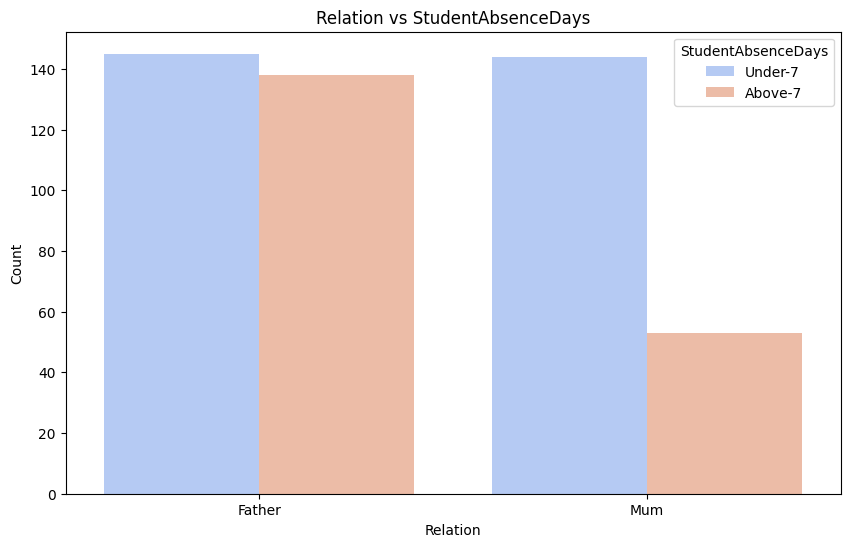

In [255]:
selected_cols = ['Relation', 'StudentAbsenceDays']
subset_df = df[selected_cols]

plt.figure(figsize=(10, 6))
sns.countplot(x='Relation', hue='StudentAbsenceDays', data=subset_df, palette='coolwarm')

plt.title('Relation vs StudentAbsenceDays')
plt.xlabel('Relation')
plt.ylabel('Count')

plt.show()


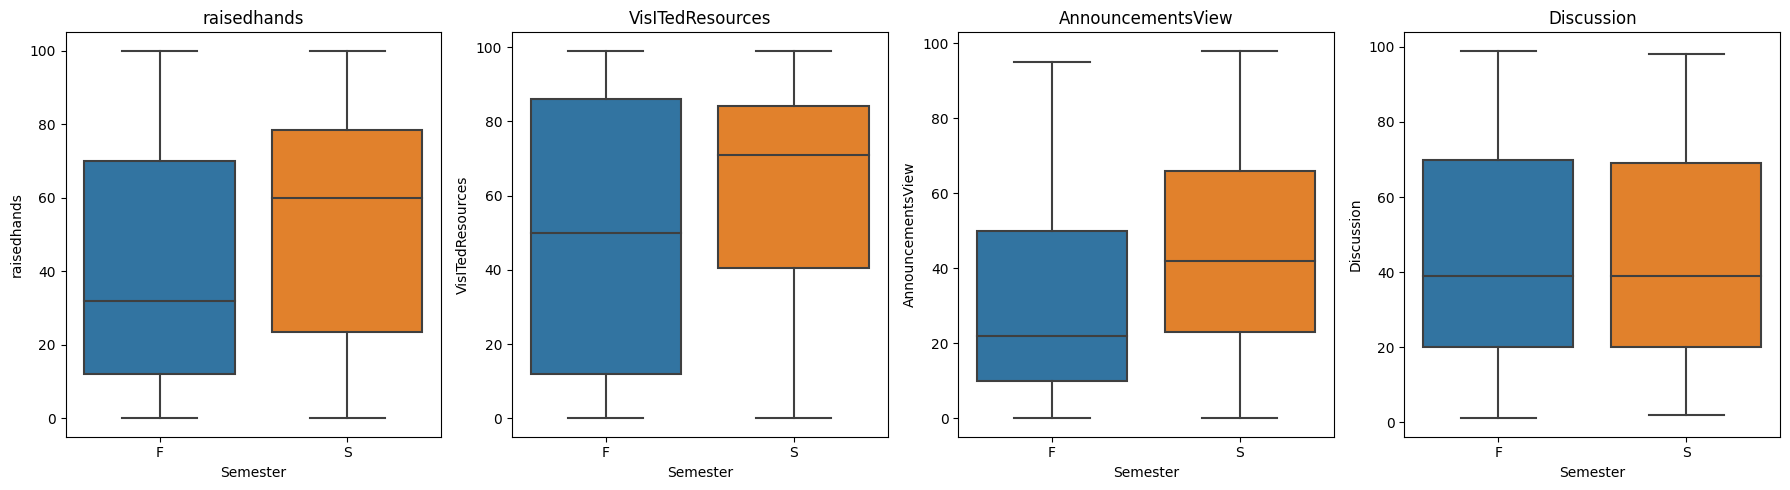

In [256]:
engagement_metrics = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

fig, axes = plt.subplots(nrows=1, ncols=len(engagement_metrics), figsize=(18, 5))

for i, metric in enumerate(engagement_metrics):
    sns.boxplot(x='Semester', y=metric, data=df, ax=axes[i])
    axes[i].set_title(metric)

# Adjust layout
plt.tight_layout()
plt.show()


In [257]:
catcols = [col for col in catcols if col not in ['Class','NationalITy','PlaceofBirth','GradeID','Topic']]
catcols

['gender',
 'StageID',
 'SectionID',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays']

In [258]:
df = pd.get_dummies(df,columns=catcols, drop_first=True)

In [259]:
df.head()

,NationalITy,PlaceofBirth,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,Level,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,KW,KuwaIT,G-04,IT,15,16,2,20,M,1,0,1,0,0,0,0,1,1,1
1,KW,KuwaIT,G-04,IT,20,20,3,25,M,1,0,1,0,0,0,0,1,1,1
2,KW,KuwaIT,G-04,IT,10,7,0,30,L,1,0,1,0,0,0,0,0,0,0
3,KW,KuwaIT,G-04,IT,30,25,5,35,L,1,0,1,0,0,0,0,0,0,0
4,KW,KuwaIT,G-04,IT,40,50,12,50,M,1,0,1,0,0,0,0,0,0,0


In [260]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df[numcols] = Scaler.fit_transform(df[numcols])

In [261]:
df.head()

,NationalITy,PlaceofBirth,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,Level,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,KW,KuwaIT,G-04,IT,-1.033429,-1.174075,-1.351167,-0.843326,M,1,0,1,0,0,0,0,1,1,1
1,KW,KuwaIT,G-04,IT,-0.870813,-1.053029,-1.313549,-0.662225,M,1,0,1,0,0,0,0,1,1,1
2,KW,KuwaIT,G-04,IT,-1.196046,-1.446426,-1.426401,-0.481125,L,1,0,1,0,0,0,0,0,0,0
3,KW,KuwaIT,G-04,IT,-0.545579,-0.901723,-1.238315,-0.300024,L,1,0,1,0,0,0,0,0,0,0
4,KW,KuwaIT,G-04,IT,-0.220346,-0.145191,-0.974994,0.243279,M,1,0,1,0,0,0,0,0,0,0


C:\Users\farzi\AppData\Local\Temp\ipykernel_22940\2553475131.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


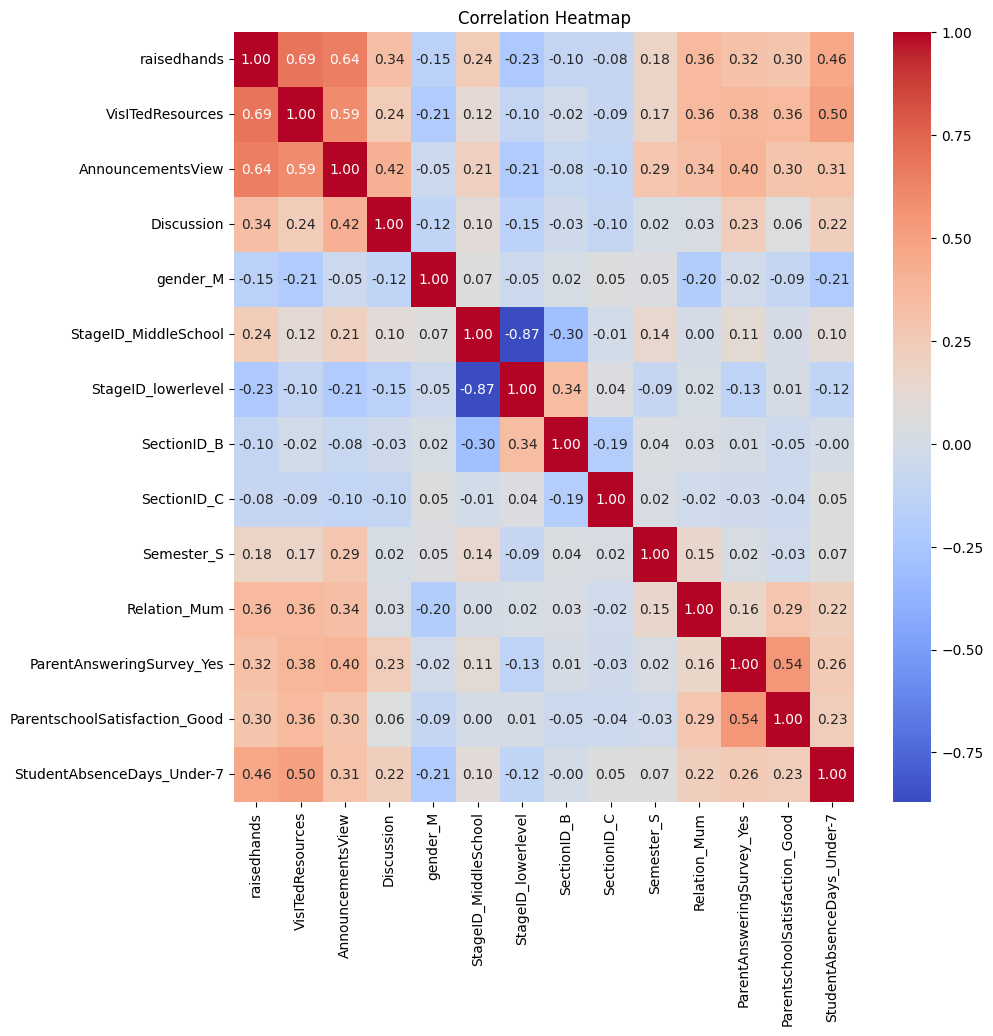

In [262]:
plt.figure(figsize=(10, 10))
cor_mat = df.corr()
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [263]:
print(cor_mat)

                               raisedhands  VisITedResources  \
raisedhands                       1.000000          0.691572   
VisITedResources                  0.691572          1.000000   
AnnouncementsView                 0.643918          0.594500   
Discussion                        0.339386          0.243292   
gender_M                         -0.149978         -0.210932   
StageID_MiddleSchool              0.240915          0.117973   
StageID_lowerlevel               -0.227928         -0.101837   
SectionID_B                      -0.100492         -0.015519   
SectionID_C                      -0.082925         -0.086973   
Semester_S                        0.178358          0.173219   
Relation_Mum                      0.364237          0.360240   
ParentAnsweringSurvey_Yes         0.316570          0.382472   
ParentschoolSatisfaction_Good     0.297015          0.363835   
StudentAbsenceDays_Under-7        0.463882          0.499030   

                               Announce